In [39]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Provided you have internet connection, the dataset can be downloaded by running the cell below, where we make use of the *ucimlrepo* Python package specifically developed for importing datasets from the UC Irvine Machine Learning Repository into scripts and notebooks. Alternatively, you can find the dataset, without any additional information (metadata/further descriptions of variables) at the following link: [<span style="color:light blue; font-weight:bold;">dataset</span>](https://archive.ics.uci.edu/static/public/913/data.csv). For a thorough understanding of the task, you can read moore details on the variables in the dataset here: [<span style="color:light blue; font-weight:bold;">variables detailed description</span>](https://editorapantanal.com.br/journal/index.php/taes/article/view/8/5)

In [3]:
# fetch dataset 
dataset = fetch_ucirepo(id=913)

The dataset as it is will be a special dictionary, of type *ucimlrepo.dotdict.dotdict* containing the dataset as dataframes, as well as metadata about the dataset.

In [4]:
type(dataset)

ucimlrepo.dotdict.dotdict

As per the documentation ([<span style="color:light blue; font-weight:bold;">ucimlrepo docs</span>](https://github.com/uci-ml-repo/ucimlrepo)), the dataset can be accessed through the *data.features* attribute. You can also check the metadata, as well as variables descriptions, through separate accessors.

In [5]:
X = dataset.data.features

In [6]:
X

,Season,Cultivar,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,NEO 760 CE,1,58.80,15.20,98.20,177.80,1.81,5.20,152.20,3232.820000
1,1,NEO 760 CE,2,58.60,13.40,102.00,195.00,1.85,7.20,141.69,3517.360000
2,1,NEO 760 CE,3,63.40,17.20,100.40,203.00,2.02,6.80,148.81,3391.460000
3,1,NEO 760 CE,4,60.27,15.27,100.20,191.93,1.89,6.40,148.50,3312.580000
4,1,MANU IPRO,1,81.20,18.00,98.80,173.00,1.75,7.40,145.59,3230.990000
...,...,...,...,...,...,...,...,...,...,...,...
315,2,FTR 4288 IPRO,4,88.33,16.33,75.73,139.00,1.84,3.67,135.19,3348.931034
316,2,FTR 3190 IPRO,1,64.40,16.60,76.00,168.00,2.21,3.60,145.69,3418.850575
317,2,FTR 3190 IPRO,2,64.60,17.60,116.80,271.20,2.32,3.80,147.24,3651.586207
318,2,FTR 3190 IPRO,3,58.80,14.80,86.40,180.60,2.09,2.20,156.32,3487.931034


In [7]:
dataset.metadata

{'uci_id': 913,
 'name': 'Forty Soybean Cultivars from Subsequent Harvests',
 'repository_url': 'https://archive.ics.uci.edu/dataset/913/forty+soybean+cultivars+from+subsequent+harvests',
 'data_url': 'https://archive.ics.uci.edu/static/public/913/data.csv',
 'abstract': 'Soybean cultivation is one of the most important because it is used in several segments of the food industry. The evaluation of soybean cultivars subject to different planting and harvesting characteristics is an ongoing field of research. We present a dataset obtained from forty soybean cultivars planted in subsequent seasons. The experiment used randomized blocks, arranged in a split-plot scheme, with four replications. The following variables were collected: plant height, insertion of the first pod, number of stems, number of legumes per plant, number of grains per pod, thousand seed weight, and grain yield, resulting in 320 data samples. The dataset presented can be used by researchers from different fields of act

In [8]:
dataset.variables

,name,role,type,demographic,description,units,missing_values
0,Season,Feature,Integer,None,1 or 2,None,no
1,Cultivar,Feature,Categorical,None,Cultivar names,None,no
2,Repetition,Feature,Integer,None,"1, 2, 3 or 4",None,no
3,PH,Feature,Continuous,None,plant height (cm) – determined from the soil s...,cm,no
4,IFP,Feature,Continuous,None,insertion of the first pod (cm) – determined f...,cm,no
5,NLP,Feature,Continuous,None,Number of stems (unit) – through manual counting;,None,no
6,NGP,Feature,Continuous,None,Number of legumes per plant (unit) – through m...,None,no
7,NGL,Feature,Continuous,None,Number of grains per plant (unit) – through ma...,None,no
8,NS,Feature,Continuous,None,Number of grains per pod (unit) – through manu...,None,no
9,MHG,Feature,Continuous,None,Thousand seed weight (g) – according to the me...,g,no


**Preliminary analysis of the dataset**

A high-level description of the numerical columns: basic statistics

In [10]:
X.describe()

,Season,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
count,320.000000,320.000000,320.000000,320.0000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,1.500000,2.500000,68.386781,15.4650,59.088313,135.085844,2.290844,4.071656,168.322313,3418.553794
std,0.500783,1.119785,8.958194,3.0243,20.068187,60.494529,0.840116,1.474531,19.625566,503.003602
min,1.000000,1.000000,47.600000,7.2000,20.200000,47.800000,0.940000,0.400000,127.060000,1538.230000
25%,1.000000,1.750000,62.950000,13.6000,44.350000,95.052500,2.000000,3.000000,153.845000,3126.611552
50%,1.500000,2.500000,67.200000,15.6000,54.500000,123.000000,2.280000,3.800000,166.150000,3397.276724
75%,2.000000,3.250000,74.347500,17.3300,71.220000,161.350000,2.480000,5.000000,183.182500,3708.262931
max,2.000000,4.000000,94.800000,26.4000,123.000000,683.400000,14.860000,9.000000,216.000000,4930.000000


Some more information: data types per column, number of non-null values

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      320 non-null    int64  
 1   Cultivar    320 non-null    object 
 2   Repetition  320 non-null    int64  
 3   PH          320 non-null    float64
 4   IFP         320 non-null    float64
 5   NLP         320 non-null    float64
 6   NGP         320 non-null    float64
 7   NGL         320 non-null    float64
 8   NS          320 non-null    float64
 9   MHG         320 non-null    float64
 10  GY          320 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 27.6+ KB


**Data cleaning**

Confirmation that there are no null values in the dataset

In [13]:
# isnull() returns a Boolean mask - a dataframe with the same dimensions as the initial dataframe
# sum() trats Trues as 1 and False as 0, then sums them up
X.isnull().sum()

Season        0
Cultivar      0
Repetition    0
PH            0
IFP           0
NLP           0
NGP           0
NGL           0
NS            0
MHG           0
GY            0
dtype: int64

We remove duplicate rows, if any.

In [19]:
X = X.drop_duplicates()

# reset the index after removing duplicates
X = X.reset_index(drop=True)

There is no ambiguous column - column with data type *object* - except for the "Cultivar" column. We check the type of each elements and count the number of occurences for each type we find. We find that all values are string values. pandas treats them as objects (superclass) for efficiency.

As a double check, we see that all 320 values in the "Cultivar" column are strings.

In [34]:
X['Cultivar'].apply(type).value_counts()

Cultivar
<class 'str'>    320
Name: count, dtype: int64

In [35]:
len(X["Cultivar"])

320

In [42]:
def outliers_for_column(df, column, k):
    # calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # calculate IQR
    IQR = Q3 - Q1

    # define lower and upper bounds
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    # identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

    return outliers

In [47]:
outliers_for_column(X, 'MHG', 1.5)

Series([], Name: MHG, dtype: float64)

As per the documentation of the [<span style="color:light blue; font-weight:bold;">seaborn.boxplot</span>](https://seaborn.pydata.org/generated/seaborn.boxplot.html) method, the whiskers in a box plot is by default computed with parameter whis=1.5, i.e. the k in the function I defined above. It is called Tukey's method. The larger the k parameter, the wider the intervals of whiskers.

I create a boxplot for all numerical values. The 'GY' column has a substantially larger range than the rest of the variables, therefore I display the boxplot for this column separately. 

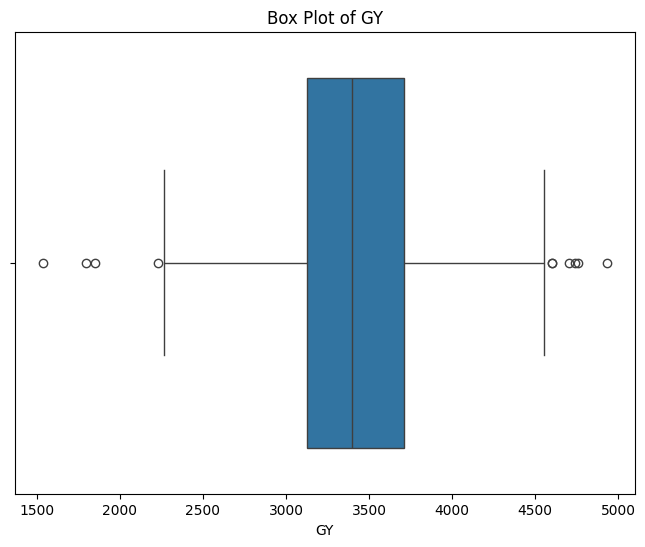

In [50]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=X['GY'])
plt.title('Box Plot of GY')
plt.xlabel('GY')
plt.show()

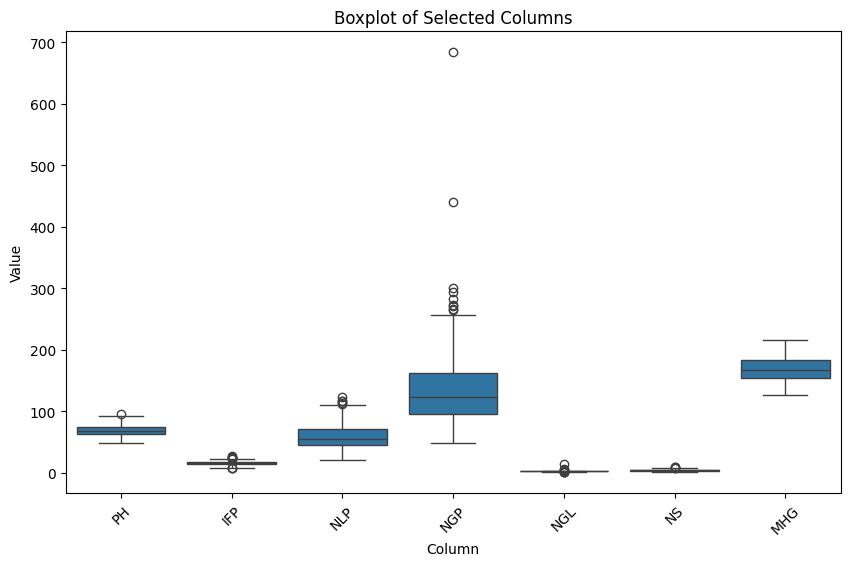

In [53]:
selected_columns = ['PH', 'IFP', 'NLP', 'NGP', 'NGL', 'NS', 'MHG']
subset_X = X[selected_columns]

# Melt the subset DataFrame to convert it to long format
melted_X = pd.melt(subset_X)

# Create a box plot for the selected columns
plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', data=melted_X)
plt.xticks(rotation=45)
plt.title('Boxplot of Selected Columns')
plt.xlabel('Column')
plt.ylabel('Value')
plt.show()

Outliers are points below the whiskers of the boxplots. As we can see, there are a few outliers for some variables. We will keep that in mind for later, when we will possibly treat them (we may choose to remove them if that improves accuracy in some models or transform them or not do anything, because they may indicate some rare conditions which can be of interest and some ML algorithms may manage them effectively)

It is good practice to standardize/normalize the features considered before feeding them to any ML model. As we saw previously, some variables may have a different range than others. Some ML algorithms are sensitive to the scale of  the features. Features with larger scales can dominate the optimization process. This leads to biased parameter estimates.